<a href="https://colab.research.google.com/github/hazelortegaaa/Summer/blob/main/(H)COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [28]:
#Imports libraries needed for each task
import pandas as pd
import numpy as np #Imports library numpy as np
import matplotlib.pyplot as plt
from matplotlib import style  #Importing the style from matplotlib

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [29]:
#This line will check to read the data from the link using pd.read_csv
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [30]:
#This line shows the data and displays the first five rows
df.head()

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0


In [31]:
#This line will
df.shape

(47998, 5)

In [32]:
#This line will print out the data from the table above, with df
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [33]:
#This line will get the data from the state of NY below using data frame
ny_df = df[df['state']=='New York']

In [34]:
#This line will print out the first five rows out of the data for each date, state, fips, cases and deaths
ny_df.head()

,date,state,fips,cases,deaths
246,2020-03-01,New York,36,1,0
261,2020-03-02,New York,36,1,0
276,2020-03-03,New York,36,2,0
293,2020-03-04,New York,36,11,0
313,2020-03-05,New York,36,22,0


In [11]:
#This line uses data frame and will print out
ny_df.shape 

(869, 5)

In [14]:
#This line will print out again the number cases and deaths and more information and will print out the first five rows
ny_df.tail()

,date,state,fips,cases,deaths
47752,2022-07-13,New York,36,5682130,69201
47808,2022-07-14,New York,36,5691891,69223
47864,2022-07-15,New York,36,5700453,69245
47920,2022-07-16,New York,36,5703638,69245
47976,2022-07-17,New York,36,5706285,69245


In [26]:
first_ny_death = ny_df[ny_df['deaths']!=0] #First death in NY
first_ny_death.head() #

,date,state,fips,cases,deaths,new_cases
669,2020-03-14,New York,36,610,2,189
722,2020-03-15,New York,36,732,6,122
775,2020-03-16,New York,36,950,10,218
828,2020-03-17,New York,36,1375,18,425
882,2020-03-18,New York,36,2387,32,1012


In [16]:
#total number of cases
ny_df['cases'].max()

5706285

In [18]:
#This will calculate the total count of cases for NY
ny_df['cases'].sum()

1904130774

Finding new covid 19 cases on daily basis (new cases added everyday)

In [27]:
#Updated and new cases for NY
#Type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [39]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [40]:
#This line shows the first ten new cases for NY
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [41]:
#Sum of the new total cases
ny_df['new_cases'].sum()

5706285

In [44]:
ny_cases = ny_df['cases'] #Will print out the cases for NY
ny_deaths = ny_df['deaths'] #Will print out the number of deaths for NY
ny_dates = ny_df['date'] #Will print out the date for NY
ny_new_cases = ny_df['new_cases'] #Will print out new cases for NY

In [45]:
type(ny_new_cases) #This line will 

pandas.core.series.Series

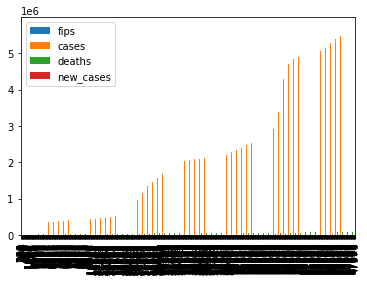

In [48]:
ny_df.plot(kind='bar') #this will will print out the graph with all the data above

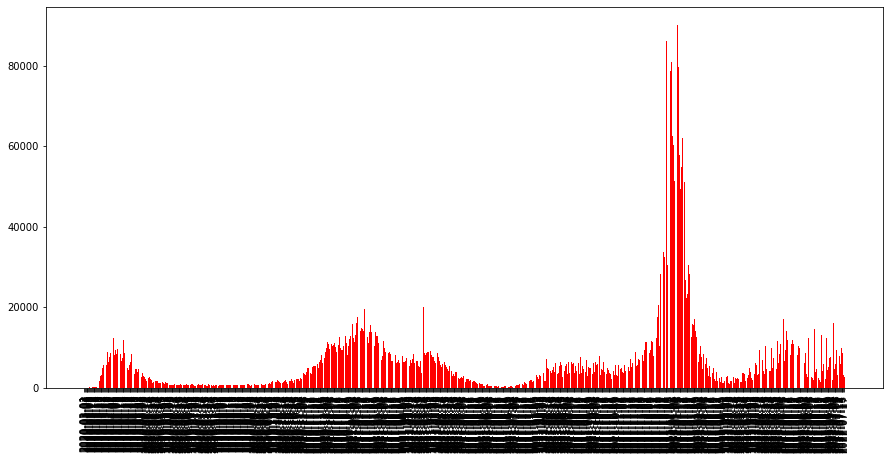

In [47]:
plt.figure(figsize=(15,7)) #Will 
plt.bar(x=ny_dates, height=ny_new_cases, color='red') #This will make the graph print out the height of new cases and will make the graph look red
plt.xticks(rotation=90) #Rotates de axes for 90 degrees
plt.show() #Show the graph

# Task4: Understand NY covid 19 data in last 30 days

In [50]:
ny_cases_30 = ny_df['cases'][-31:-1] #This line will print out the last 30 number of cases for NY
ny_deaths_30 = ny_df['deaths'] [-31:-1] #Last 30 numbers of death cases for NY
ny_dates_30 = ny_df['date'][-31:-1] #Last 30 numbers of deates cases for NY
ny_new_cases_30 = ny_df['new_cases'][-31:-1] #Last 30 numbers of new cases for NY

In [51]:
# ny_dates_30

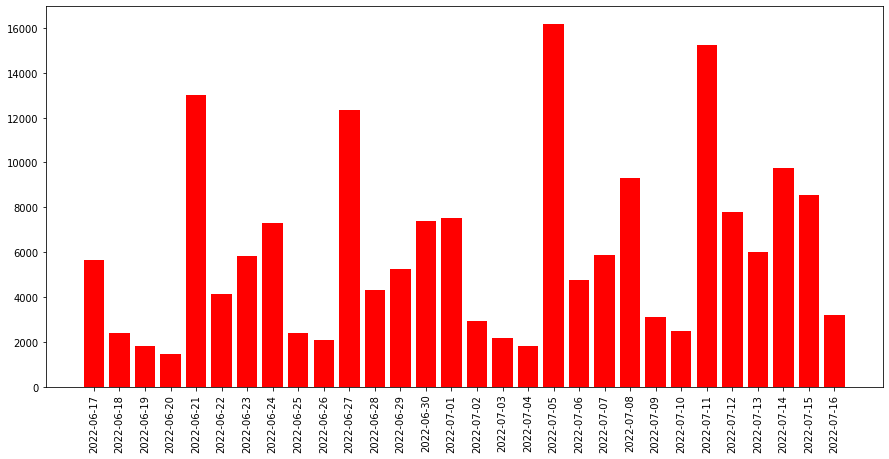

In [54]:
plt.figure(figsize=(15,7)) #This line is using matplotlib (plt) and also the size (figsize)
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red') #This line will create the style of the graph (dates, height, cases and color)
plt.xticks(rotation=90) #Rotates the x axis to 90 degrees
plt.show() #Show the graph

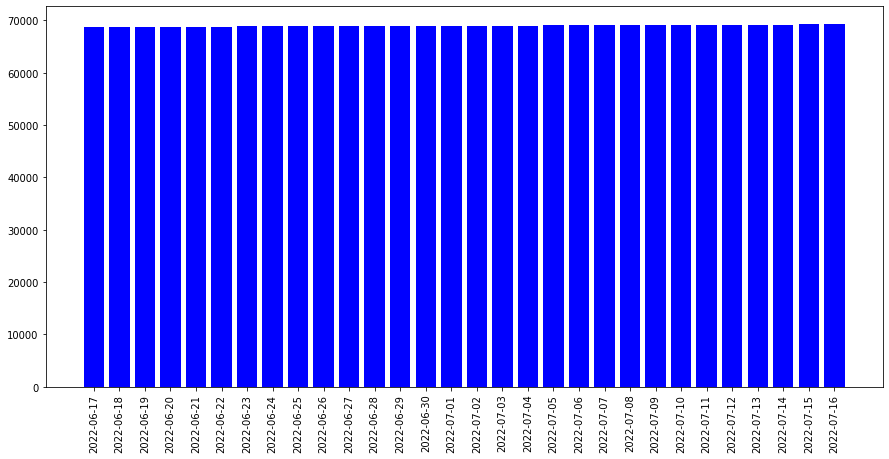

In [59]:
plt.figure(figsize=(15,7)) #This line will show the figsize (15,7)
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='blue') #This will will make the style for the graph and set up the dates, height, the cases of deaths and set to color blue
plt.xticks(rotation=90) #Rotates x axis to 90 degrees
plt.show() #Shows graph

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [57]:
states = ['New York', 'California','Florida', 'Texas','Arizona'] #This line will show the states we want to show on teh graph, so we have (NY, CA, FL, TX, AZ)

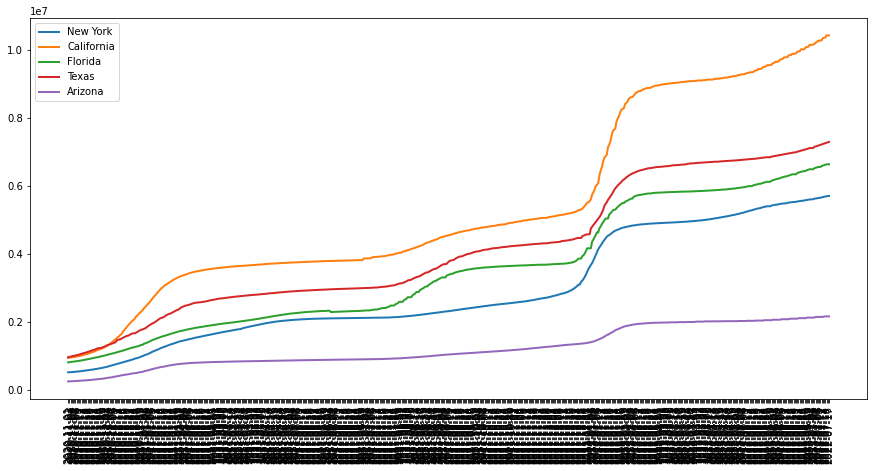

In [58]:
plt.figure(figsize=(15,7)) #This line will make figsize (15,7)
for state in states: 
  df_st = df[(df['state']==state) & (df['date']>='2020-11-01')] #This line uses data frame for the states and dates
  plt.plot(df_st['date'], #Data frame for dates
           df_st['cases'], #Data frame for cases
           linewidth=2 #Line declares for linewith 2
           )
  plt.xticks(rotation=90) #Rotates x axis to 90 degrees
plt.legend(states) #Shows the states
plt.show() #Shows the graph

# Conclusion

Below are the conclusions:



1.   Conclusion 1: What I can conclude from this COVID19 Data Analysis is that some of the cases for COVID19 it peaked at some certain times. As we can see for NY we have graphs that show how new cases were raising.
Some cases were really high and some ohers were low.


2.   Conclusion 2: What I can conclude from this COVID19 Data Analysis is that we have different data for COVID19 in different states, new cases were showing that it peaked at certain time. We also can't forget that some of theses states have a high population rate, for example California. Therefore, this was the highest case and its followed up by Texas, Florida, New York and Arizona.

